In [110]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import matplotlib
import sys

In [111]:
# Load our data
LocationAllData = "../data-cleanup/merged-cleaned-csv/driving_data_merged_1_to_24.csv"
df = pd.read_csv(LocationAllData)

In [112]:
## Create a new column which assigns each row to a specific distance window.
## The values in each window are averaged later on

# Decide which distance to average over
distanceWindowWidth = 50

def assignDistanceWindow(distance):
  # Get which distance pocket it would fit in.   
  distanceWindowIndex = round(distance/distanceWindowWidth)
  return distanceWindowWidth * distanceWindowIndex

# Add a new row which containts which distance group each row belongs to  
df["distanceWindow"] = df["distanceTraveled"].apply(assignDistanceWindow)

In [113]:
# extract the data we need into a new data frame
needed_data = df[["Attempt nr","evisID","userID", "distanceWindow","speed","currentStateOfCharge","yPosition"]].copy()

### Individual user based calculations

# Group the data based on attempt, which EVIS and userID
# Set as_index to false to allow access to these values later on for plotting
groups = needed_data.groupby(["Attempt nr","evisID","userID", "distanceWindow"], as_index=False)

# Compute mean values for each user in each group and store in a new dataframe. This computes only the mean of given columns
average_individual = groups[["speed","currentStateOfCharge","yPosition"]].mean().copy()
# Create a group object again from the dataframe to allow for easy itteration when plotting
average_individual_grouped = average_individual.groupby(["Attempt nr","evisID","userID"])

### Group based calculations

average_group_based = average_individual.copy()
# Group based on each distance window for each attempt and which EVIS used
average_group_based_grouped = average_group_based.groupby(["Attempt nr","evisID","distanceWindow"], as_index=False)
# Calculate the mean for each group 
average_group_based = average_group_based_grouped[["speed","currentStateOfCharge","yPosition"]].mean()
# Finally re-group them based on how we want to plot the group based mean
average_group_based_grouped = average_group_based.groupby(["Attempt nr","evisID"])

### Average road height calc

# Create a copy of the data we need from the group based calculations
average_road_height = average_group_based[["distanceWindow","yPosition"]].copy()
# Group by just the distance window and calculate the mean of the yPosition
average_road_height = average_road_height.groupby(["distanceWindow"], as_index=False).mean()
# Rename yPosition to road height for our convenience
average_road_height = average_road_height.rename(columns={"yPosition":"roadHeight"})

In [114]:
## Plot window presets

plt.style.use("default")
params = {
  'font.size': 20, 
  'axes.labelsize': 18,
  'axes.titlesize':20, 
  'legend.fontsize': 18, 
  'xtick.labelsize': 18, 
  'ytick.labelsize': 18
 }
matplotlib.rcParams.update(params)

In [115]:
## Decide which attempt to plot and what colors to use

whichAttempt = 1
colorCOPE1 = "C0"
colorDiffCOPE1 = "C1"
colorRoadHeight = "k"

In [116]:
%%capture out
# Prevent displaying of plot in this cell

fig, ax =  plt.subplots(figsize=(15,10))
ax2 = ax.twinx()

ax.set_xlabel("Distance [m]")
ax.set_ylabel("Speed [km/h]")
ax.set_title("Speed over distance traveled during attempt #" + str(whichAttempt))

# Plot the individual attempts as transparent lines. At the end of each attempt, plot a dot to mark it
for name,group in average_individual_grouped:
    if name[0] == whichAttempt and name[1] == "GuessOMeter":
        ax.plot(group["distanceWindow"], group["speed"], color=colorCOPE1, zorder=1, linewidth=2, alpha=0.4)
        ax.plot(group["distanceWindow"].iloc[-1], group["speed"].iloc[-1], zorder=1, color=colorCOPE1, marker="o", 
                markersize=10, alpha=.5)
    if name[0] == whichAttempt and name[1] == "DiffAndCOPE1":
        ax.plot(group["distanceWindow"], group["speed"], color=colorDiffCOPE1, zorder=1, linestyle="-", linewidth=2, alpha=0.4)
        ax.plot(group["distanceWindow"].iloc[-1], group["speed"].iloc[-1], zorder=1, color=colorDiffCOPE1, marker="o", 
                markersize=10, alpha=.5)

# Plot the average for each group. Attempt #1 + Guess-o-meter is one group for example
for name,group in average_group_based_grouped:
    if name[0] == whichAttempt and name[1] == "GuessOMeter":
        ax.plot(group["distanceWindow"], group["speed"], color=colorCOPE1, zorder=3, linewidth=4, alpha=1)
    if name[0] == whichAttempt and name[1] == "DiffAndCOPE1":
        ax.plot(group["distanceWindow"], group["speed"], color=colorDiffCOPE1, zorder=3, linewidth=4, alpha=1)

In [117]:
## Plot the road height averaged over all the drives
ax2.set_ylabel('Road height [m]', color=colorRoadHeight)
road_height_plot, = ax2.plot(average_road_height["distanceWindow"], average_road_height["roadHeight"], color=colorRoadHeight, 
          zorder=2, linewidth=2, linestyle="--", alpha=1, label="Road height")

## Attempt #1 for speed over distance traveled

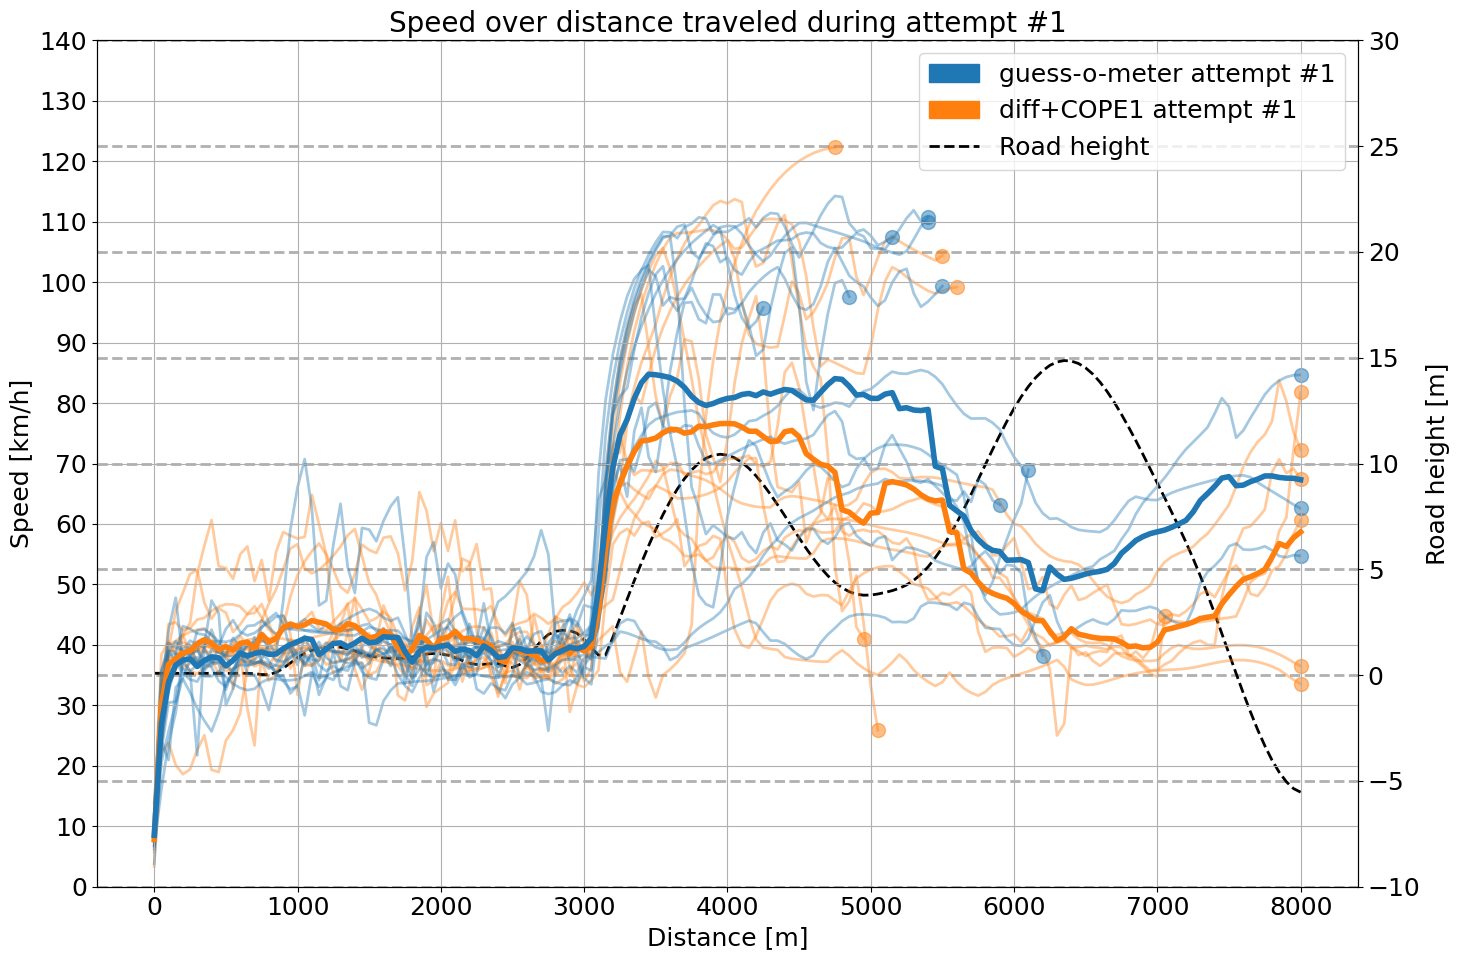

In [118]:
## Adjustments for our plot

# Custom legend  
first_patch = patches.Patch(color=colorCOPE1, label="guess-o-meter attempt #" + str(whichAttempt))
second_patch = patches.Patch(color=colorDiffCOPE1, label="diff+COPE1 attempt #" + str(whichAttempt))

ax.legend(handles=[first_patch, second_patch, road_height_plot])

ax.set_ylim(0,140)
ax2.set_ylim(-10,30)

ax.set_yticks(np.arange(0,141,10)) 
ax2.set_yticks(np.arange(-10,31,5)) 

ax.grid(True)
ax2.grid(True, linestyle="--", linewidth=2)

# Prevent secondary axis from drawing ontop of everything
ax.set_zorder(1)
ax.patch.set_visible(False)

fig.tight_layout()

fig

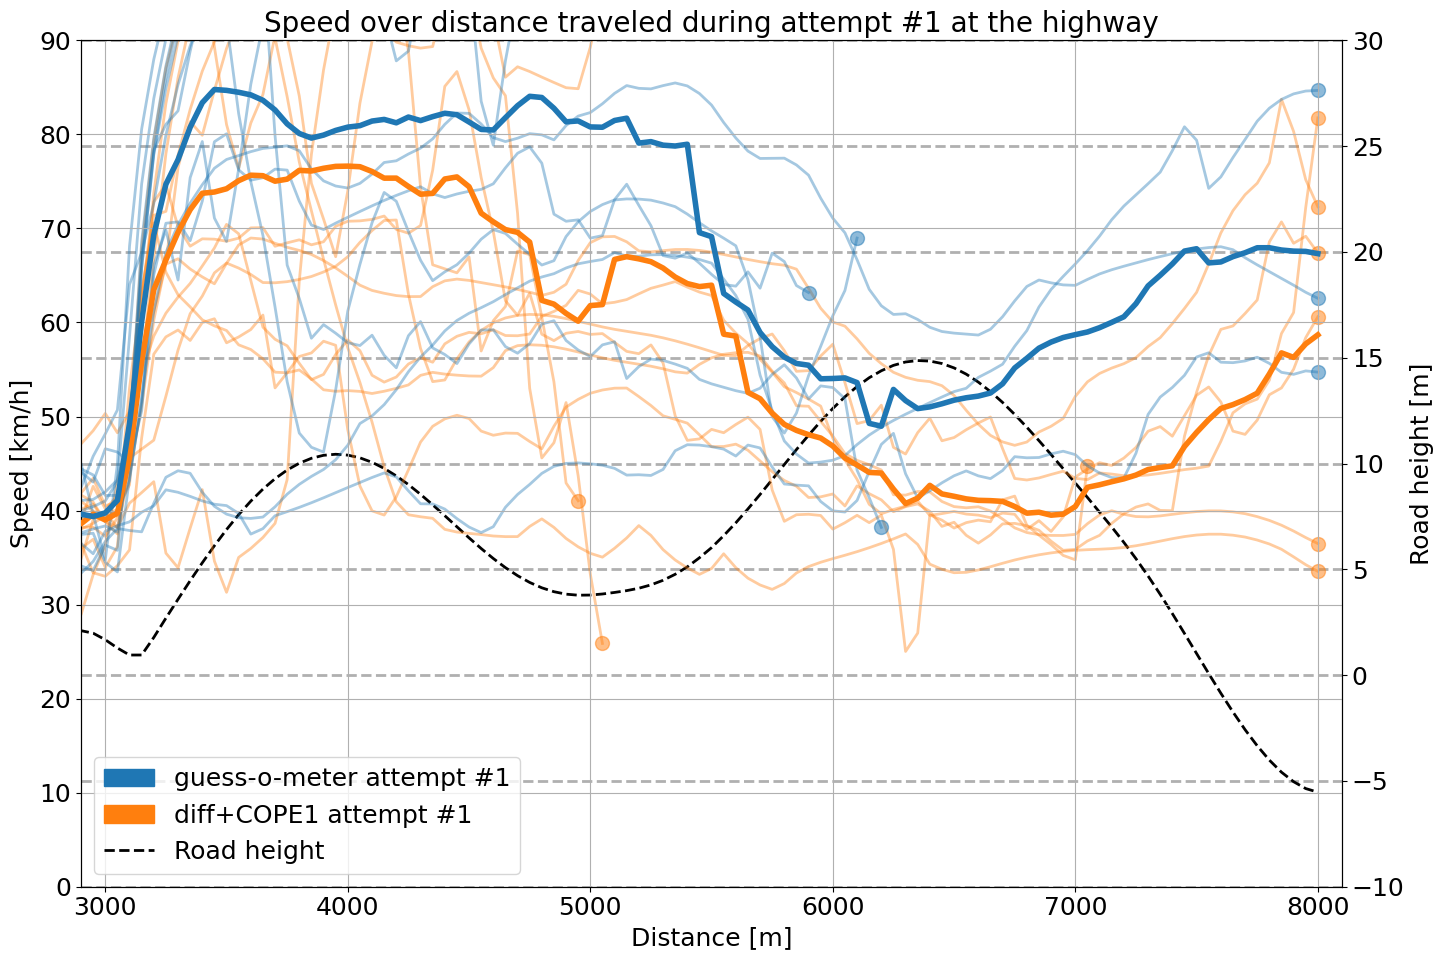

In [119]:
ax.set_title("Speed over distance traveled during attempt #" + str(whichAttempt) + " at the highway")
ax.set_xlim(2900,8100)
ax.set_ylim(0,90)
fig

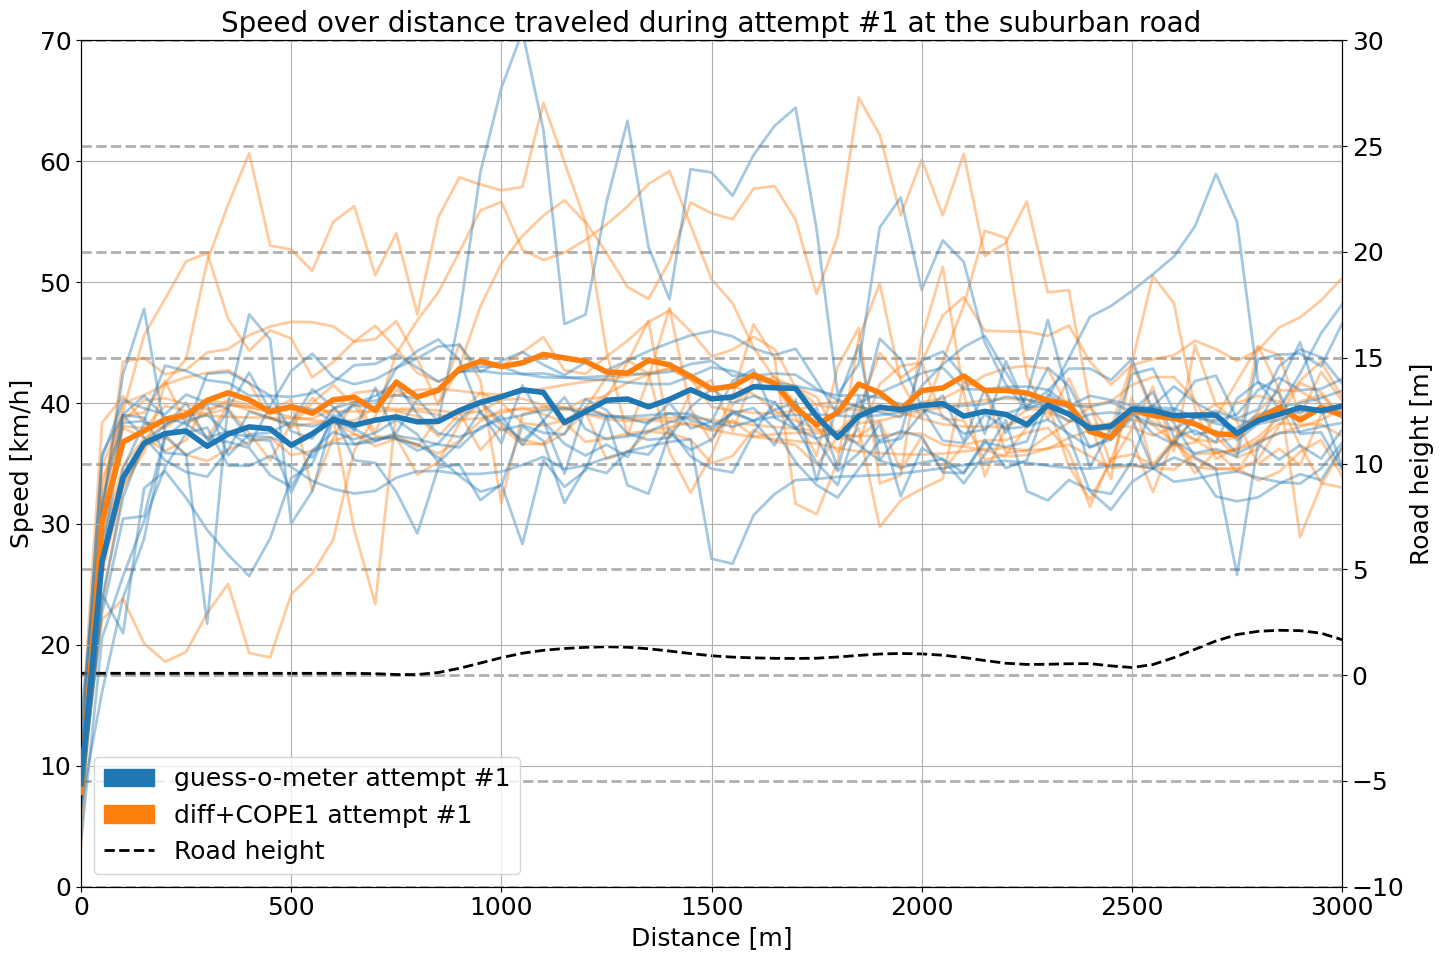

In [120]:
ax.set_title("Speed over distance traveled during attempt #" + str(whichAttempt) + " at the suburban road")
ax.set_xlim(0,3000)
ax.set_ylim(0,70)
fig

## Attempt #2 for speed over distance traveled

In [121]:
whichAttempt = 2
colorCOPE1 = "C0"
colorDiffCOPE1 = "C1"
colorRoadHeight = "k"

In [122]:
%%capture out
# Prevent displaying of plot in this cell

fig, ax =  plt.subplots(figsize=(15,10))
ax2 = ax.twinx()

ax.set_xlabel("Distance [m]")
ax.set_ylabel("Speed [km/h]")
ax.set_title("Speed over distance traveled during attempt #" + str(whichAttempt))

# Plot the individual attempts as transparent lines. At the end of each attempt, plot a dot to mark it
for name,group in average_individual_grouped:
    if name[0] == whichAttempt and name[1] == "GuessOMeter":
        ax.plot(group["distanceWindow"], group["speed"], color=colorCOPE1, zorder=1, linewidth=2, alpha=0.4)
        ax.plot(group["distanceWindow"].iloc[-1], group["speed"].iloc[-1], zorder=1, color=colorCOPE1, marker="o", 
                markersize=10, alpha=.5)
    if name[0] == whichAttempt and name[1] == "DiffAndCOPE1":
        ax.plot(group["distanceWindow"], group["speed"], color=colorDiffCOPE1, zorder=1, linestyle="-", linewidth=2, alpha=0.4)
        ax.plot(group["distanceWindow"].iloc[-1], group["speed"].iloc[-1], zorder=1, color=colorDiffCOPE1, marker="o", 
                markersize=10, alpha=.5)

# Plot the average for each group. Attempt #1 + Guess-o-meter is one group for example
for name,group in average_group_based_grouped:
    if name[0] == whichAttempt and name[1] == "GuessOMeter":
        ax.plot(group["distanceWindow"], group["speed"], color=colorCOPE1, zorder=3, linewidth=4, alpha=1)
    if name[0] == whichAttempt and name[1] == "DiffAndCOPE1":
        ax.plot(group["distanceWindow"], group["speed"], color=colorDiffCOPE1, zorder=3, linewidth=4, alpha=1)

In [123]:
## Plot the road height averaged over all the drives
ax2.set_ylabel('Road height [m]', color=colorRoadHeight)
road_height_plot, = ax2.plot(average_road_height["distanceWindow"], average_road_height["roadHeight"], color=colorRoadHeight, 
          zorder=2, linewidth=2, linestyle="--", alpha=1, label="Road height")

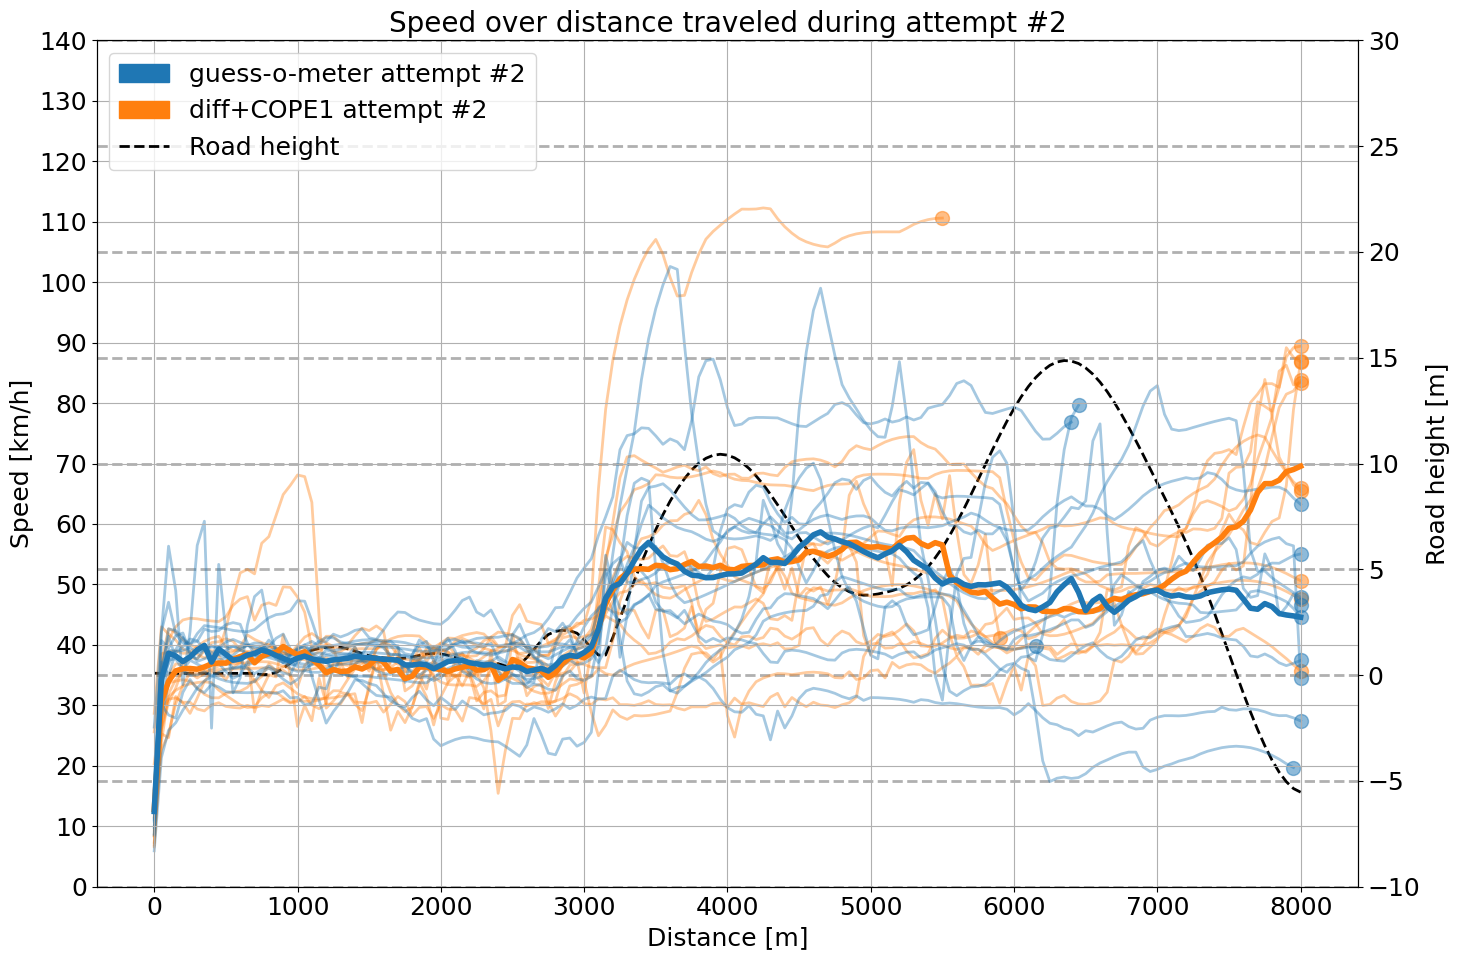

In [124]:
# Custom legend  
first_patch = patches.Patch(color=colorCOPE1, label="guess-o-meter attempt #" + str(whichAttempt))
second_patch = patches.Patch(color=colorDiffCOPE1, label="diff+COPE1 attempt #" + str(whichAttempt))

ax.legend(handles=[first_patch, second_patch, road_height_plot], loc='upper left')

ax.set_ylim(0,140)
ax2.set_ylim(-10,30)

ax.set_yticks(np.arange(0,141,10)) 
#ax.set_yticks((0, 50, 100, 150)) 
ax2.set_yticks(np.arange(-10,31,5)) 

ax.grid(True)
ax2.grid(True, linestyle="--", linewidth=2)

ax.set_zorder(1)
ax.patch.set_visible(False)

fig.tight_layout()

fig

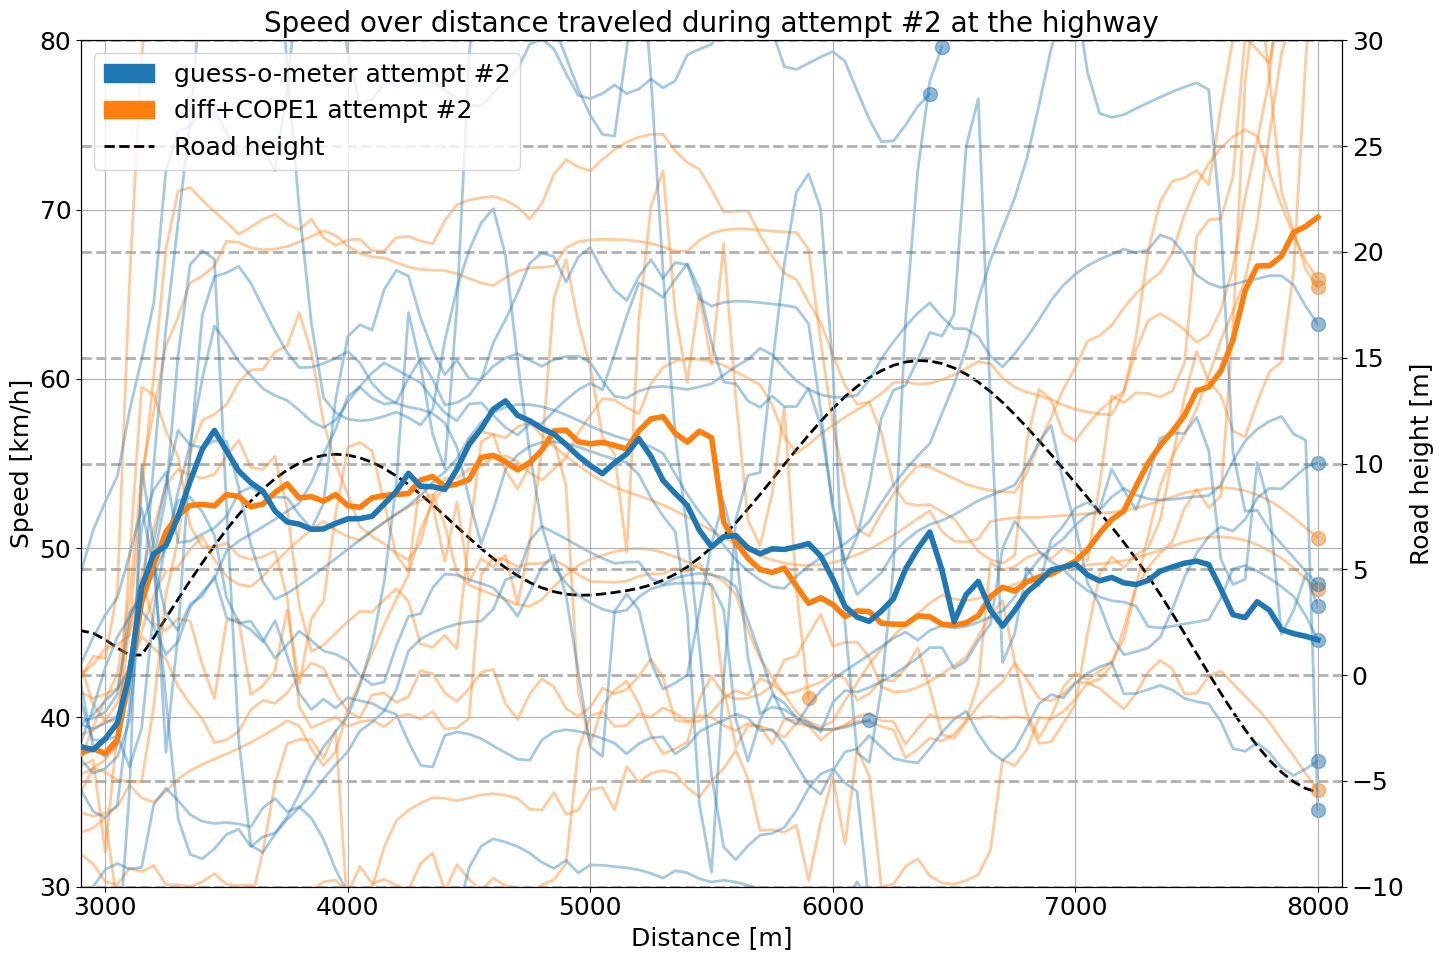

In [125]:
ax.set_title("Speed over distance traveled during attempt #" + str(whichAttempt) + " at the highway")
ax.set_xlim(2900,8100)
ax.set_ylim(30,80)
fig

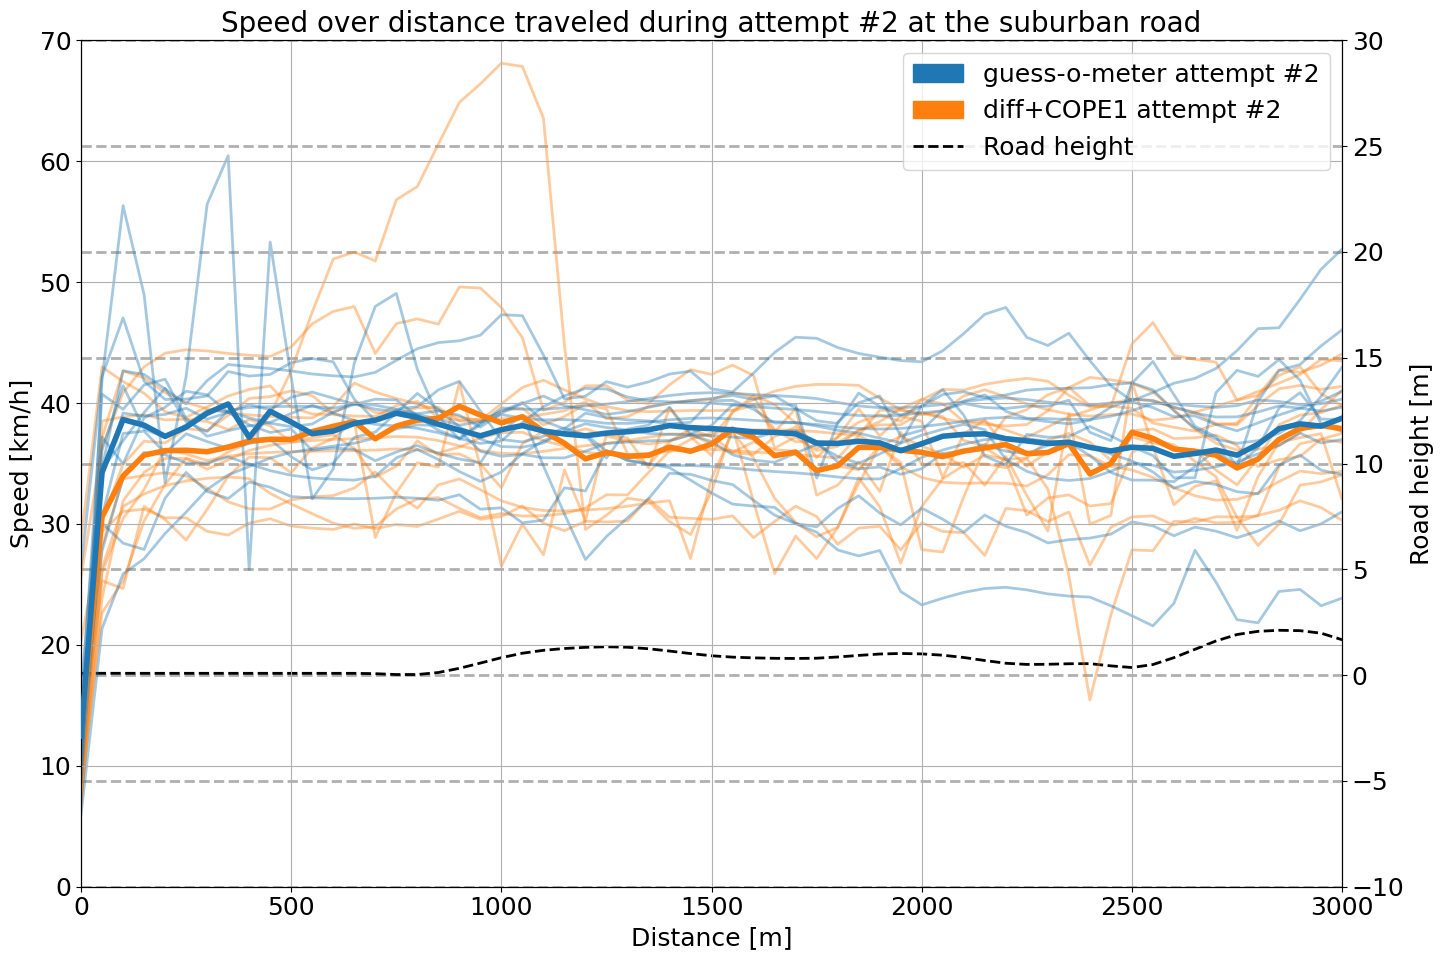

In [126]:
ax.set_title("Speed over distance traveled during attempt #" + str(whichAttempt) + " at the suburban road")
ax.set_xlim(0,3000)
ax.set_ylim(0,70)
ax.legend(handles=[first_patch, second_patch, road_height_plot], loc='upper right')
fig

## Comparsion between attempt #1 & #2

# SoC

In [127]:
whichAttempt = 1
colorCOPE1 = "C0"
colorDiffCOPE1 = "C1"
colorRoadHeight = "k"

In [128]:
%%capture out
# Prevent displaying of plot in this cell

## 

fig, ax =  plt.subplots(figsize=(15,10))
ax2 = ax.twinx()

ax.set_xlabel("Distance [m]")
ax.set_ylabel("SoC [kWh]")
ax.set_title("SoC over distance traveled during attempt #" + str(whichAttempt))

# Plot the individual attempts as transparent lines. At the end of each attempt, plot a dot to mark it
for name,group in average_individual_grouped:
    if name[0] == whichAttempt and name[1] == "GuessOMeter":
        ax.plot(group["distanceWindow"], group["currentStateOfCharge"], color=colorCOPE1, zorder=1, linewidth=2, alpha=0.4)
        ax.plot(group["distanceWindow"].iloc[-1], group["currentStateOfCharge"].iloc[-1], zorder=1, color=colorCOPE1, marker="o", 
                markersize=10, alpha=.5)
    if name[0] == whichAttempt and name[1] == "DiffAndCOPE1":
        ax.plot(group["distanceWindow"], group["currentStateOfCharge"], color=colorDiffCOPE1, zorder=1, linestyle="-", linewidth=2, alpha=0.4)
        ax.plot(group["distanceWindow"].iloc[-1], group["currentStateOfCharge"].iloc[-1], zorder=1, color=colorDiffCOPE1, marker="o", 
                markersize=10, alpha=.5)

# Plot the average for each group. Attempt #1 + Guess-o-meter is one group for example
for name,group in average_group_based_grouped:
    if name[0] == whichAttempt and name[1] == "GuessOMeter":
        ax.plot(group["distanceWindow"], group["currentStateOfCharge"], color=colorCOPE1, zorder=3, linewidth=4, alpha=1)
    if name[0] == whichAttempt and name[1] == "DiffAndCOPE1":
        ax.plot(group["distanceWindow"], group["currentStateOfCharge"], color=colorDiffCOPE1, zorder=3, linewidth=4, alpha=1)

In [129]:
## Plot the road height averaged over all the drives

ax2.set_ylabel('Road height [m]', color=colorRoadHeight)  # we already handled the x-label with ax1
road_height_plot, = ax2.plot(average_road_height["distanceWindow"], average_road_height["roadHeight"], color=colorRoadHeight, 
          zorder=2, linewidth=2, linestyle="--", alpha=1, label="Road height")
#ax2.tick_params(axis='y', labelcolor=color)

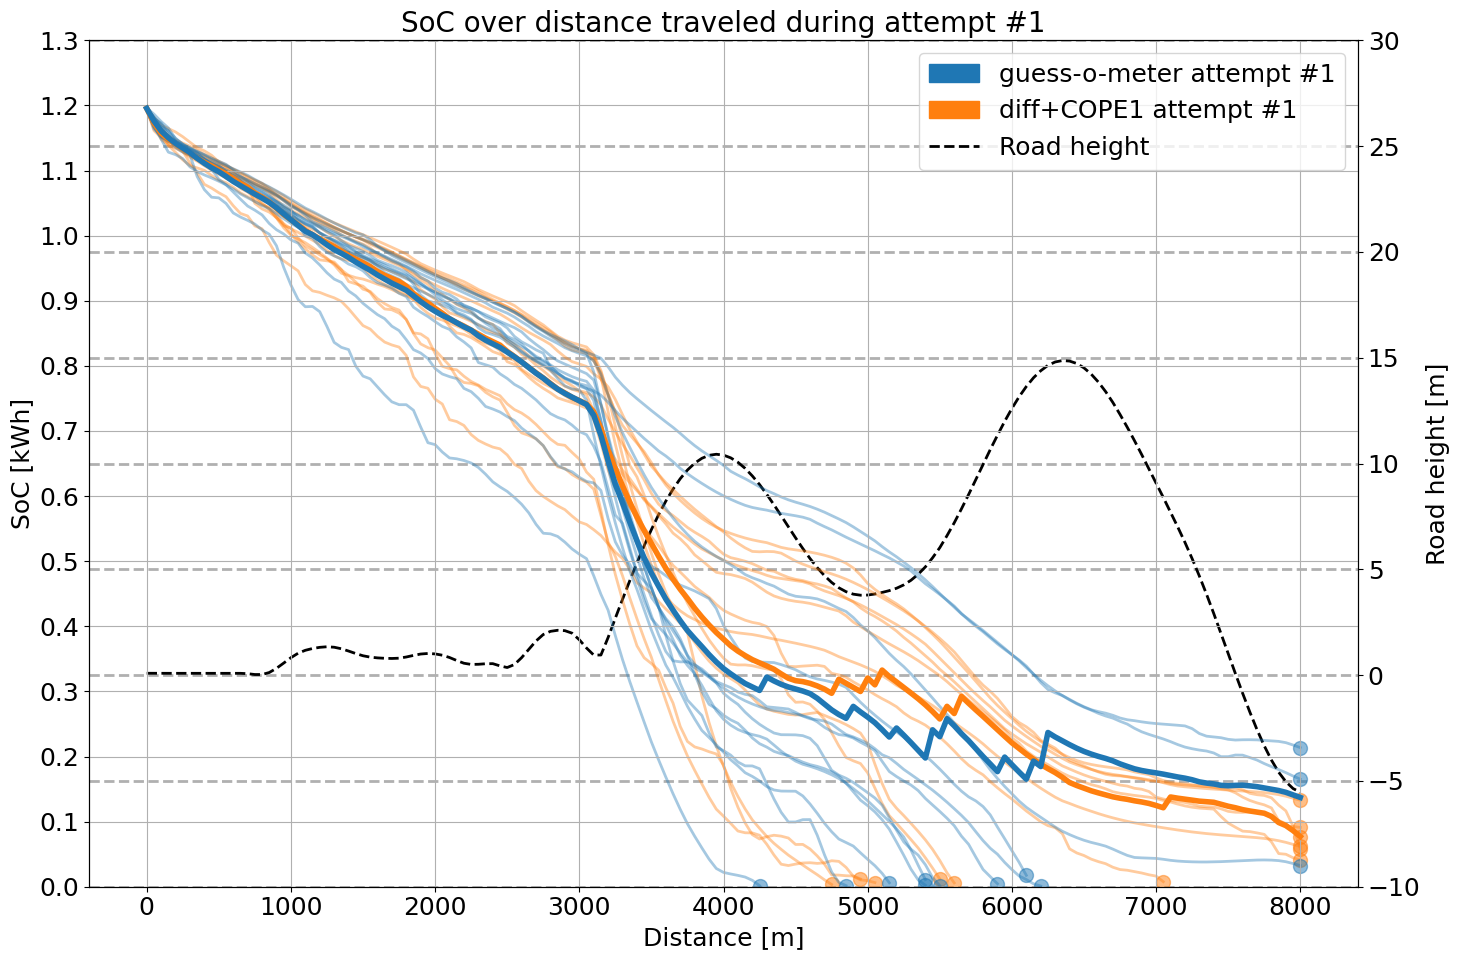

In [130]:
# Custom legend  
first_patch = patches.Patch(color=colorCOPE1, label="guess-o-meter attempt #" + str(whichAttempt))
second_patch = patches.Patch(color=colorDiffCOPE1, label="diff+COPE1 attempt #" + str(whichAttempt))

ax.legend(handles=[first_patch, second_patch, road_height_plot])

ax.set_ylim(0,1.3)
ax2.set_ylim(-10,30)

ax.set_yticks(np.arange(0,1.31,0.1)) 
ax2.set_yticks(np.arange(-10,31,5)) 

ax.grid(True)
ax2.grid(True, linestyle="--", linewidth=2)

ax.set_zorder(1)
ax.patch.set_visible(False)

fig.tight_layout()

fig

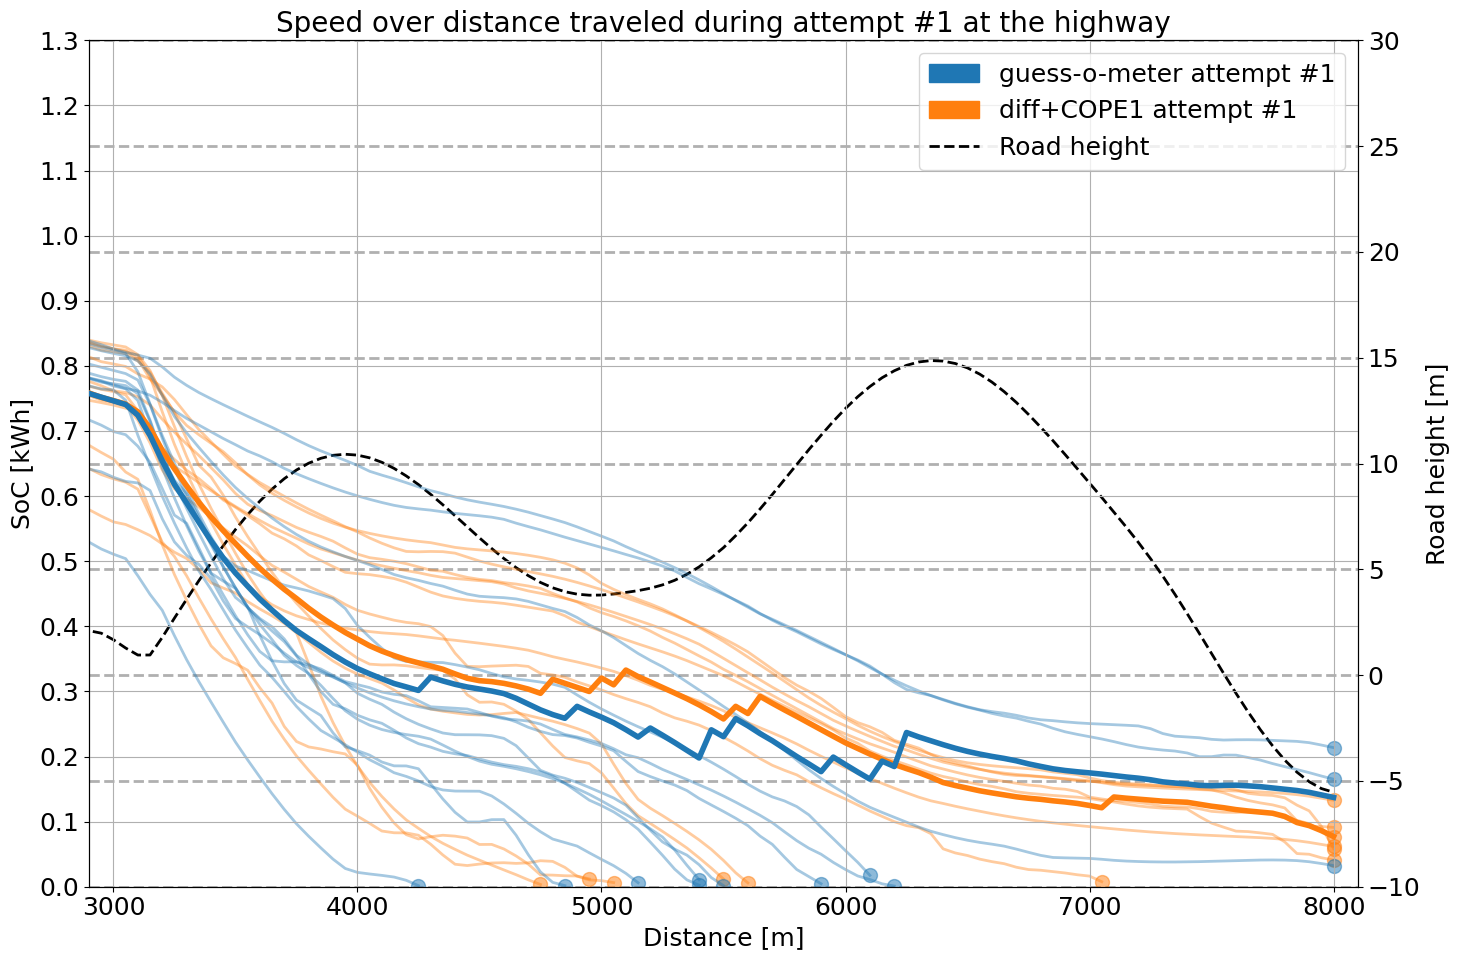

In [131]:
ax.set_title("Speed over distance traveled during attempt #" + str(whichAttempt) + " at the highway")
ax.set_xlim(2900,8100)
ax.set_ylim(0,1.3)
fig

In [132]:
whichAttempt = 2
colorCOPE1 = "C0"
colorDiffCOPE1 = "C1"
colorRoadHeight = "k"

In [133]:
%%capture out
# Prevent displaying of plot in this cell

## 

fig, ax =  plt.subplots(figsize=(15,10))
ax2 = ax.twinx()

ax.set_xlabel("Distance [m]")
ax.set_ylabel("SoC [kWh]")
ax.set_title("SoC over distance traveled during attempt #" + str(whichAttempt))

# Plot the individual attempts as transparent lines. At the end of each attempt, plot a dot to mark it
for name,group in average_individual_grouped:
    if name[0] == whichAttempt and name[1] == "GuessOMeter":
        ax.plot(group["distanceWindow"], group["currentStateOfCharge"], color=colorCOPE1, zorder=1, linewidth=2, alpha=0.4)
        ax.plot(group["distanceWindow"].iloc[-1], group["currentStateOfCharge"].iloc[-1], zorder=1, color=colorCOPE1, marker="o", 
                markersize=10, alpha=.5)
    if name[0] == whichAttempt and name[1] == "DiffAndCOPE1":
        ax.plot(group["distanceWindow"], group["currentStateOfCharge"], color=colorDiffCOPE1, zorder=1, linestyle="-", linewidth=2, alpha=0.4)
        ax.plot(group["distanceWindow"].iloc[-1], group["currentStateOfCharge"].iloc[-1], zorder=1, color=colorDiffCOPE1, marker="o", 
                markersize=10, alpha=.5)

# Plot the average for each group. Attempt #1 + Guess-o-meter is one group for example
for name,group in average_group_based_grouped:
    if name[0] == whichAttempt and name[1] == "GuessOMeter":
        ax.plot(group["distanceWindow"], group["currentStateOfCharge"], color=colorCOPE1, zorder=3, linewidth=4, alpha=1)
    if name[0] == whichAttempt and name[1] == "DiffAndCOPE1":
        ax.plot(group["distanceWindow"], group["currentStateOfCharge"], color=colorDiffCOPE1, zorder=3, linewidth=4, alpha=1)

In [134]:
## Plot the road height averaged over all the drives

ax2.set_ylabel('Road height [m]', color=colorRoadHeight)  # we already handled the x-label with ax1
road_height_plot, = ax2.plot(average_road_height["distanceWindow"], average_road_height["roadHeight"], color=colorRoadHeight, 
          zorder=2, linewidth=2, linestyle="--", alpha=1, label="Road height")
#ax2.tick_params(axis='y', labelcolor=color)

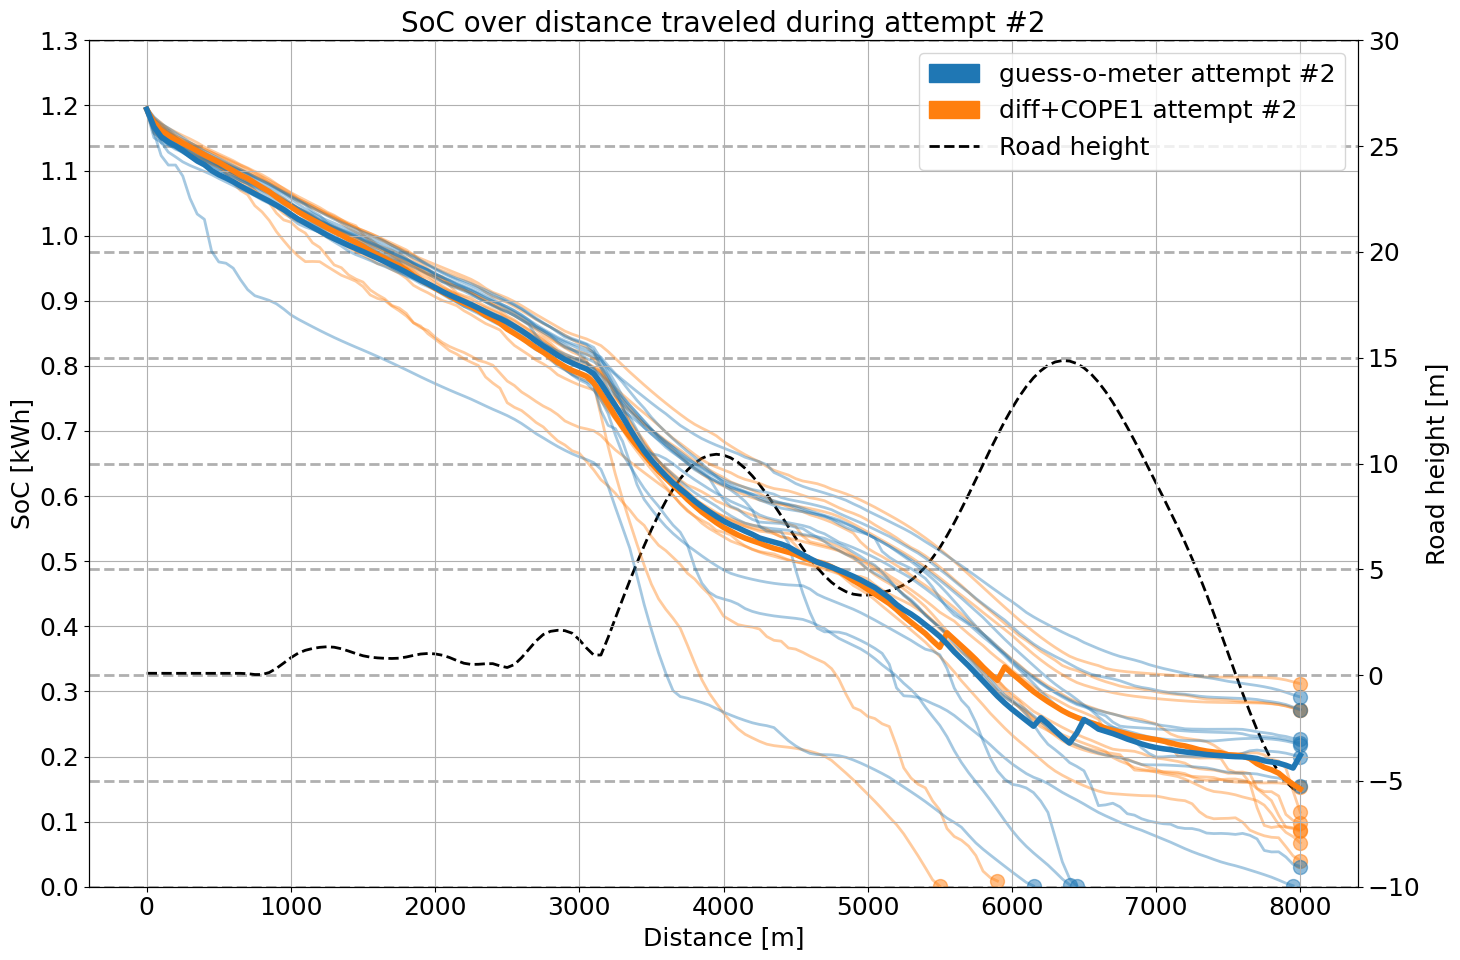

In [135]:
# Custom legend  
first_patch = patches.Patch(color=colorCOPE1, label="guess-o-meter attempt #" + str(whichAttempt))
second_patch = patches.Patch(color=colorDiffCOPE1, label="diff+COPE1 attempt #" + str(whichAttempt))

ax.legend(handles=[first_patch, second_patch, road_height_plot])

ax.set_ylim(0,1.3)
ax2.set_ylim(-10,30)

ax.set_yticks(np.arange(0,1.31,0.1)) 
ax2.set_yticks(np.arange(-10,31,5)) 

ax.grid(True)
ax2.grid(True, linestyle="--", linewidth=2)

ax.set_zorder(1)
ax.patch.set_visible(False)

fig.tight_layout()

fig

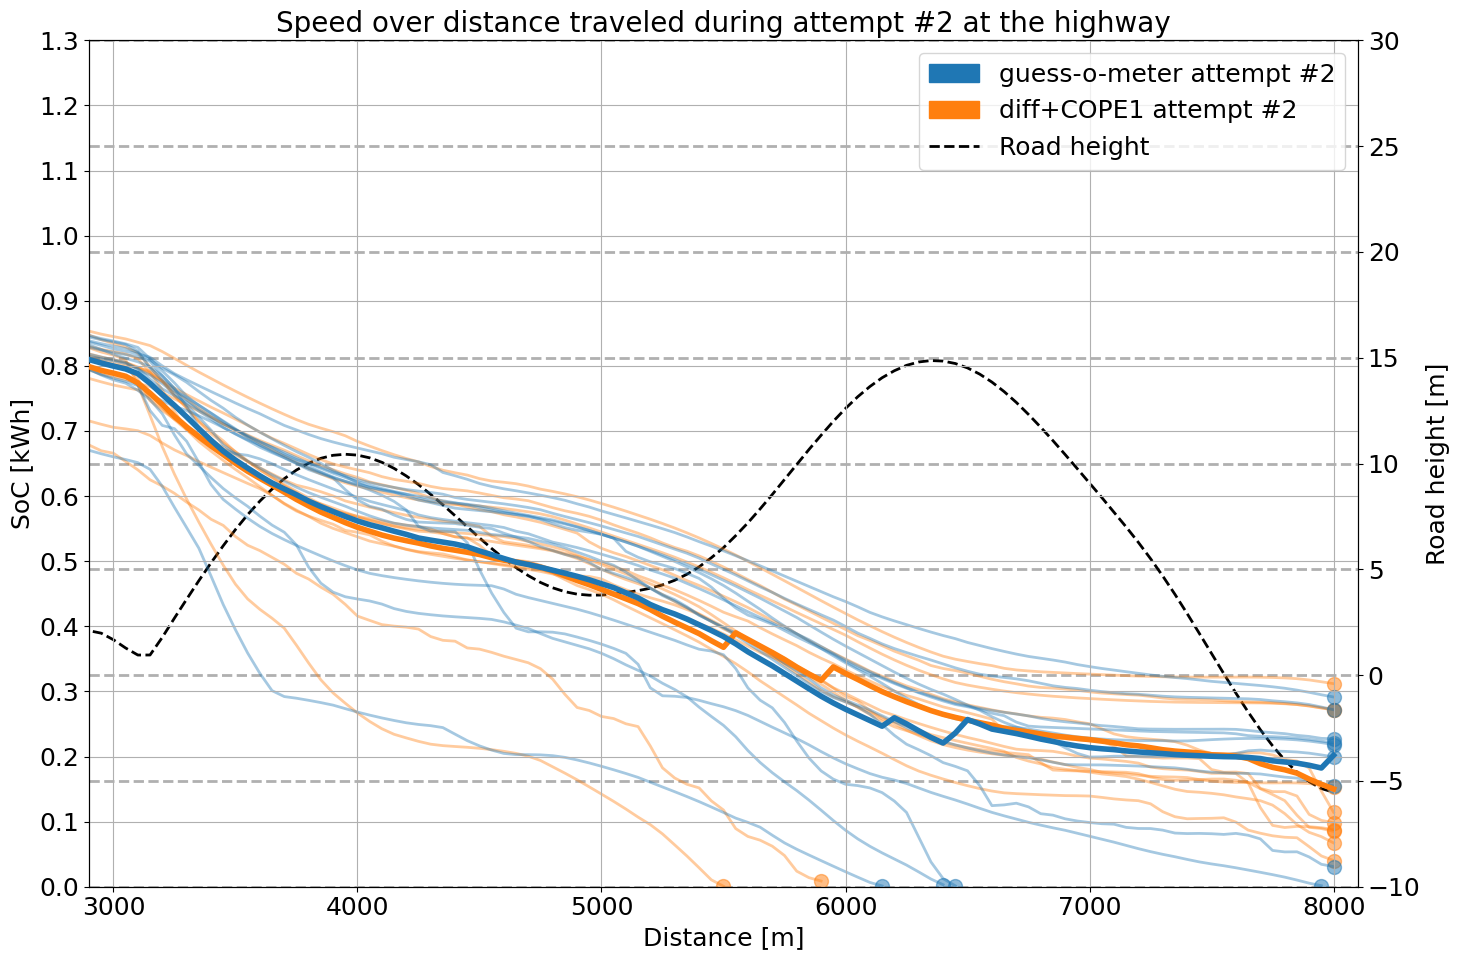

In [136]:
ax.set_title("Speed over distance traveled during attempt #" + str(whichAttempt) + " at the highway")
ax.set_xlim(2900,8100)
ax.set_ylim(0,1.3)
fig